In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
students = pd.read_csv('stud_math.csv')

In [3]:
display(students.sample(10))
students.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
34,GP,M,16,U,GT3,T,3.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,yes,no,no,-3.0,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0
229,GP,F,17,U,GT3,A,2.0,1.0,other,NaN,course,mother,2.0,3.0,0.0,no,no,no,yes,yes,-9.0,yes,yes,yes,NaN,2.0,3.0,3.0,10.0,60.0
313,GP,F,19,U,NaN,NaN,3.0,2.0,services,other,reputation,other,2.0,2.0,NaN,no,NaN,NaN,no,no,-6.0,yes,yes,yes,4.0,2.0,2.0,1.0,22.0,55.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,NaN,no,yes,yes,yes,yes,-6.0,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
356,MS,F,17,R,GT3,T,4.0,4.0,teacher,services,other,father,2.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,4.0,65.0
338,GP,F,18,U,LE3,T,3.0,3.0,services,services,home,mother,1.0,4.0,0.0,no,yes,no,no,yes,-12.0,yes,yes,no,5.0,NaN,3.0,1.0,7.0,85.0
195,GP,F,17,U,NaN,T,2.0,NaN,services,services,course,father,1.0,2.0,0.0,no,NaN,no,yes,yes,-6.0,yes,yes,yes,NaN,3.0,2.0,5.0,0.0,75.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,course,NaN,1.0,1.0,0.0,yes,yes,yes,no,yes,-3.0,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

395 строк, 30 колонок. Из низ 13 числовых, 17 строковых

In [27]:
def first_look(col, boundaries=None):
    print('Столбец', col)
    print('Распределение признака:')
    fig, ax = plt.subplots()
    sns.countplot(students.loc[:, col], ax=ax)
    plt.show()
    display(pd.DataFrame(students[col].value_counts()))
    print('Процент пропусков:', str(
        round(100 - students.loc[:, col].count()/students.shape[0]*100, 2)) + '%')
    print()

Столбец school
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


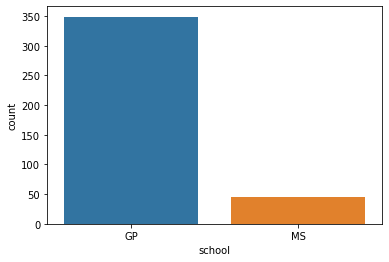

,school
GP,349
MS,46


Процент пропусков: 0.0%

Столбец sex
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


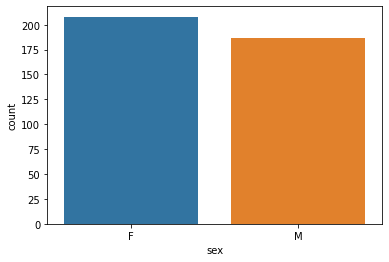

,sex
F,208
M,187


Процент пропусков: 0.0%

Столбец address
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


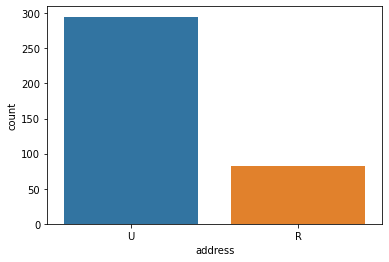

,address
U,295
R,83


Процент пропусков: 4.3%

Столбец famsize
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


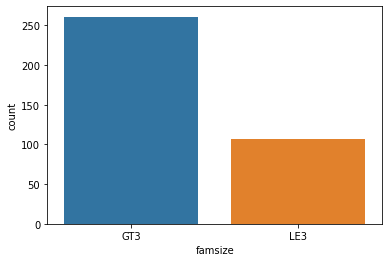

,famsize
GT3,261
LE3,107


Процент пропусков: 6.84%

Столбец Pstatus
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


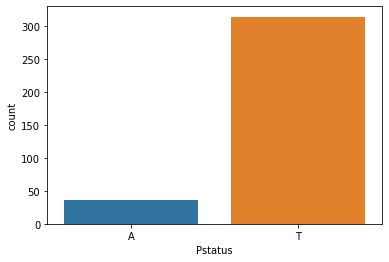

,Pstatus
T,314
A,36


Процент пропусков: 11.39%

Столбец Mjob
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


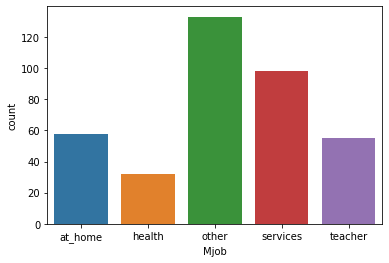

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Процент пропусков: 4.81%

Столбец Fjob
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


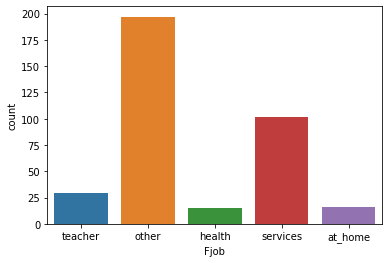

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Процент пропусков: 9.11%

Столбец reason
Распределение признака:


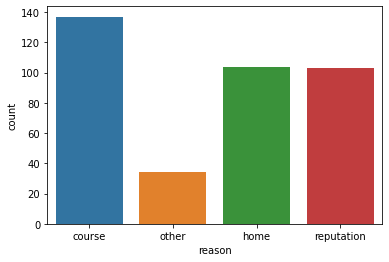

,reason
course,137
home,104
reputation,103
other,34


Процент пропусков: 4.3%

Столбец guardian
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


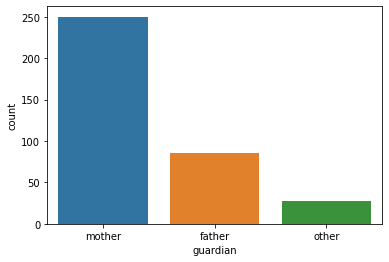

,guardian
mother,250
father,86
other,28


Процент пропусков: 7.85%

Столбец schoolsup
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


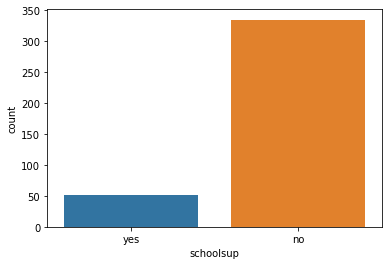

,schoolsup
no,335
yes,51


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Процент пропусков: 2.28%

Столбец famsup
Распределение признака:


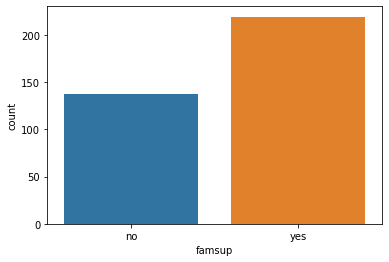

,famsup
yes,219
no,137


Процент пропусков: 9.87%

Столбец paid
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


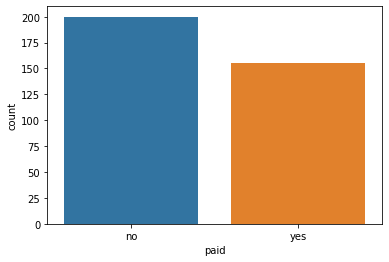

,paid
no,200
yes,155


Процент пропусков: 10.13%

Столбец activities
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


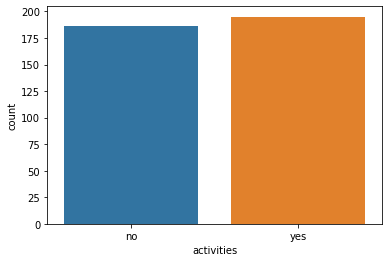

,activities
yes,195
no,186


Процент пропусков: 3.54%

Столбец nursery
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


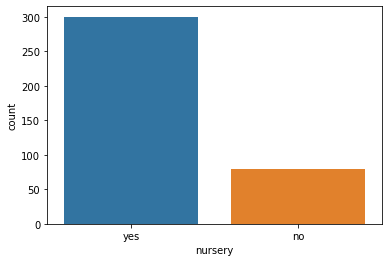

,nursery
yes,300
no,79


Процент пропусков: 4.05%

Столбец higher
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


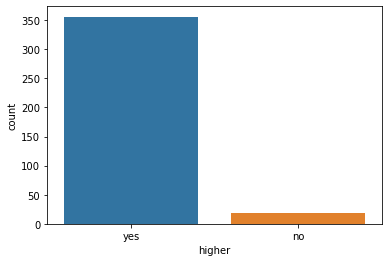

,higher
yes,356
no,19


Процент пропусков: 5.06%

Столбец internet
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


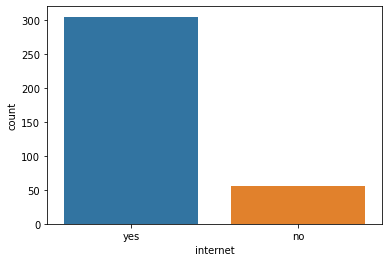

,internet
yes,305
no,56


Процент пропусков: 8.61%

Столбец romantic
Распределение признака:


C:\Users\gbvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


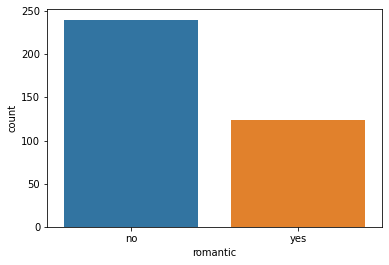

,romantic
no,240
yes,124


Процент пропусков: 7.85%



In [29]:
for col in students.columns:
    if students[col].dtype == 'O':
        first_look(col)

In [21]:
students['school'].dtype == 'O'

True